<a href="https://colab.research.google.com/github/jlhsu666/git_diabetes/blob/main/keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#載入 MNIST 資料集
(_, _), (test_images, test_labels) = mnist.load_data()

#資料預處理
x_test = test_images.reshape((10000, 28 , 28)) #←將 10000 筆測試樣本做同樣的轉換
x_test = x_test.astype('float32') / 255       #←將 10000 筆測試標籤做同樣的轉換
y_test  = to_categorical(test_labels)

from tensorflow.keras.models import load_model  #←匯入 load_model 函式

model = load_model('MnistModel.h5')  #← 由檔案載入模型

test_loss, test_acc = model.evaluate(x_test, y_test) #←用測試資料評估成效
print('對測試資料的準確率：', test_acc)

313/313 [==============================] - 7s 21ms/step - loss: 0.0261 - accuracy: 0.9915
對測試資料的準確率： 0.9915000200271606


In [ ]:
from tensorflow.keras.datasets import imdb    #← 從 keras.datasets 套件中匯入 imdb
(a_train, b_train),(a_test, b_test)= imdb.load_data(num_words=10000) # 載入 IMDB

from tensorflow.keras.preprocessing.text import Tokenizer
tok = Tokenizer(num_words=10000)           #←指定字典的總字數
x_train = tok.sequences_to_matrix(a_train) #←將訓練樣本做 k-hot 編碼
x_test  = tok.sequences_to_matrix(a_test)  #←將測試樣本做 k-hot 編碼

y_train = b_train.astype('float32')  #←將訓練標籤轉為浮點向量
y_test  = b_test.astype('float32')    #←將測試標籤轉為浮點向量

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()                       #←建立模型物件
model.add(Dense(16, activation='relu', input_dim=10000))  #←輸入層
model.add(Dense(16, activation='relu'))    #←隱藏層
model.add(Dense(1, activation='sigmoid'))  #←輸出層

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=4,      # 只訓練 4 週期
                    verbose=2)     # 不顯示進度條

loss, acc = model.evaluate(x_test, y_test, verbose=2)  # 用測試資料評估實際的成效
print('準確率：', acc)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/4
49/49 - 2s - loss: 0.4188 - acc: 0.8321 - 2s/epoch - 43ms/step
Epoch 2/4
49/49 - 1s - loss: 0.2486 - acc: 0.9119 - 1s/epoch - 29ms/step
Epoch 3/4
49/49 - 2s - loss: 0.1934 - acc: 0.9313 - 2s/epoch - 32ms/step
Epoch 4/4
49/49 - 1s - loss: 0.1647 - acc: 0.9405 - 1s/epoch - 24ms/step
782/782 - 1s - loss: 0.3009 - acc: 0.8818 - 1s/epoch - 2ms/step
準確率： 0.8818399906158447


In [ ]:
from tensorflow.keras.datasets import reuters  # 匯入 reuters 資料集

(a_train, b_train),(a_test, b_test) = reuters.load_data(num_words=10000)

from tensorflow.keras.preprocessing.text import Tokenizer  #←匯入 Tokenizer 類別

tok = Tokenizer(num_words=10000)           #←指定字典的總字數
x_train = tok.sequences_to_matrix(a_train) #←將訓練樣本做 multi-hot 編碼
x_test  = tok.sequences_to_matrix(a_test)  #←將測試樣本做 multi-hot 編碼

from tensorflow.keras.utils import to_categorical

y_train = b_train  #←直接使用載入的原始標籤 (已為 NumPy 向量)
y_test  = b_test   #←直接使用載入的原始標籤 (已為 NumPy 向量)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10000))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    batch_size=512,   # 每批次 512 筆樣本
                    epochs=10,        # 只訓練 10 週期
                    verbose=0)      # 不顯示訊息

loss, acc = model.evaluate(x_test, y_test, verbose=2)  #←評估訓練成效
print('評估測試資料的準確率 =', acc)

2110848/2110848 [==============================] - 0s 0us/step
71/71 - 0s - loss: 0.9637 - acc: 0.7939 - 265ms/epoch - 4ms/step
評估測試資料的準確率 = 0.7938557267189026


第 0 摺訓練與驗證

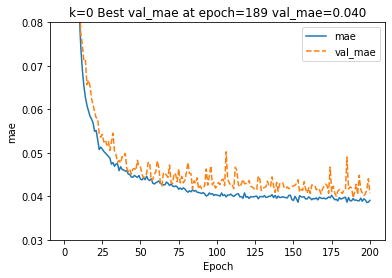

第 1 摺訓練與驗證

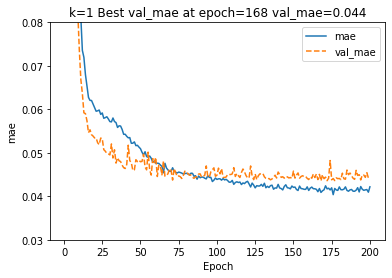

第 2 摺訓練與驗證

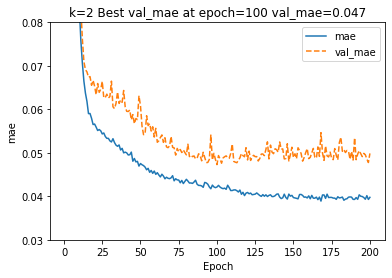

第 3 摺訓練與驗證

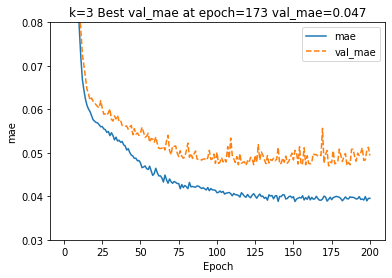

平均的最佳週期=173, val_mae=0.045


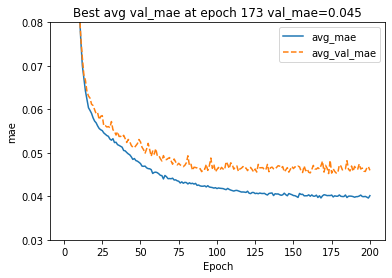

用所有的訓練資料重新訓練到第 173 週期
用測試資料評估的結果 mae=0.051


In [ ]:
import pandas as pd
import util2 as u     # 匯入自訂的工具模組

df = pd.read_csv("Admission_Predict_Ver1.1.csv",sep = ",")

import numpy as np

np.random.seed(6)       # 設定亂數的種子, 以便每次執行產生的亂數序列都相同
ds = df.values          # 取出 DataFrame 中的資料 (不含標題欄)
np.random.shuffle(ds)   # 將所有資料洗牌 (隨機重排)

x = ds[:, 1:8]   # 取出所有資料列的第 1 到 7 欄資料做為樣本資料
y = ds[:, 8]     # 取出所有資料列的第 8 欄資料做為標籤資料

x_train = x[:400]  #} 前 400 筆 (0~399) 做為訓練用
y_train = y[:400]  #}
x_test  = x[400:]  #} 後 100 筆 (400~499) 做為測試用
y_test  = y[400:]  #}

###############################

mean = x_train.mean(axis=0)  #←沿著第 0 軸 (樣本數軸) 對每個特徵做平均, 因此 mean.shape 為 (13,)
std = x_train.std(axis=0)    #←沿著第 0 軸 (樣本數軸) 對每個特徵算標準差, std.shape 同樣為 (13,)

x_train -= mean  #← 將訓練樣本減平均值
x_train /= std   #← 再除以標準差

x_test  -= mean  #← 將測試樣本減平均值
x_test  /= std   #← 再除以標準差

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, activation='relu', input_dim=7))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))           #←不加任何啟動函數
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

wt = model.get_weights()    #←儲存模型的初始權重
ksize = len(x_train) // 4   #←計算每折的資料筆數
all_his_mae = []   #←建立變數來儲存每次訓練的 mae 歷史資料
all_his_val = []   #←建立變數來儲存每次訓練的 val_mae 歷史資料

#    print('開始 k 摺驗證', end='')
for i in range(4):
    print(f'第 {i} 摺訓練與驗證', end='')
    fr, to = i*ksize, (i+1)*ksize  #←計算驗證資料的起點 fr 和終點 to (不含)
    x_val = x_train[fr: to]        #←取出驗證樣本
    x_trn = np.concatenate([x_train[ :fr],  #←取出訓練樣本：取驗證資料以外的部份
                            x_train[to: ]], axis=0)
    y_val = y_train[fr: to]        #←取出驗證標籤
    y_trn = np.concatenate([y_train[ :fr],  #←取出訓練標籤：取驗證資料以外的部份
                            y_train[to: ]], axis=0)

    model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
    history =  model.fit(x_trn, y_trn,
                         validation_data=(x_val, y_val),  #←指定驗證資料
                         epochs=200,      #←訓練 200 次
                         batch_size=4,    #←每批次 4 筆資料
                         verbose=0)       #←安靜模式 (不顯示訊息)
    hv = history.history['val_mae']  #←取得驗證的歷史記錄
    idx = np.argmin(hv)       #←找出最佳驗證週期
    val = hv[idx]             #←取得最佳驗證的 mae 值
    u.plot(history.history,   #←繪製準確率的歷史線圖
           ('mae', 'val_mae'),
            f'k={i} Best val_mae at epoch={idx+1} val_mae={val:.3f}',
           ('Epoch','mae'), ylim=(0.03, 0.08)) #←限制 y 軸的數值範圍以方便觀看

    all_his_mae.append(history.history['mae'])     #←儲存 mae 歷史驗證資料
    all_his_val.append(history.history['val_mae']) #←儲存 val_mae 歷史驗證資料

avg_mae = np.mean(all_his_mae, axis=0)  #}←沿著第 0 軸 (k 折軸) 對每個 mae做平均,
avg_val = np.mean(all_his_val, axis=0)  #}  因此傳回 shape 為 (200,) 的向量
idx = np.argmin(avg_val)  #←找出最佳平均驗證結果的週期 (由 0 算起)
val =avg_val[idx]         #←取得最佳平均驗證的 val_mae 值
print(f'平均的最佳週期={idx+1}, val_mae={val:.3f}')  #←顯示最佳週期 (由 1 算起) 及其 val_mae 值
u.plot({'avg_mae': avg_mae, 'avg_val_mae': avg_val},  #←繪製歷史線圖
       ('avg_mae', 'avg_val_mae',),
       f'Best avg val_mae at epoch {idx+1} val_mae={val:.3f}',
       ('Epoch','mae'), ylim=(0.03, 0.08)) #←限制 y 軸的數值範圍以方便觀看

print(f'用所有的訓練資料重新訓練到第 {idx+1} 週期')
model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
history =  model.fit(x_train, y_train,  #←用所有訓練資料進行訓練
                     epochs=idx+1,      #←訓練到最佳週期就停止
                     batch_size=4,      #←每批次 4 筆資料
                     verbose=0)         #←安靜模式 (不顯示訊息)
loss, mae = model.evaluate(x_test, y_test, verbose=0)  #←用測試資料評估成效
print(f'用測試資料評估的結果 mae={mae:.3f}')

●訓練與測試 Dense( 4, 0) epoch=200 batch= 1：>0>1>2>3>平均最佳週期=112 val_mae=0.043

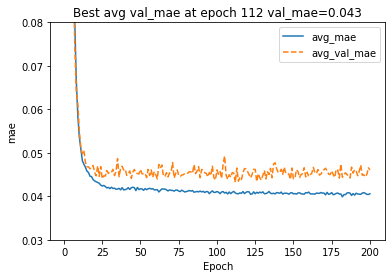

用所有訓練資料重新訓練到第 112 週期, 用測試資料評估 mae=0.047
●訓練與測試 Dense( 8, 0) epoch=200 batch= 1：>0>1>2>3>平均最佳週期= 42 val_mae=0.044

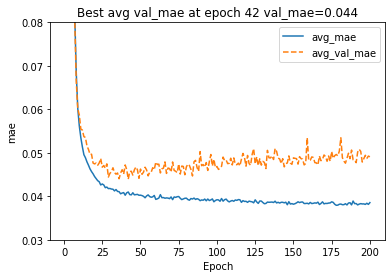

用所有訓練資料重新訓練到第 42 週期, 用測試資料評估 mae=0.051
●訓練與測試 Dense(16, 0) epoch=200 batch= 1：>0>1>2>3>平均最佳週期= 73 val_mae=0.048

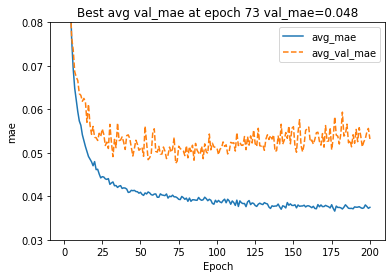

用所有訓練資料重新訓練到第 73 週期, 用測試資料評估 mae=0.056
●訓練與測試 Dense( 4, 4) epoch=200 batch= 1：>0>1>2>3>平均最佳週期= 88 val_mae=0.044

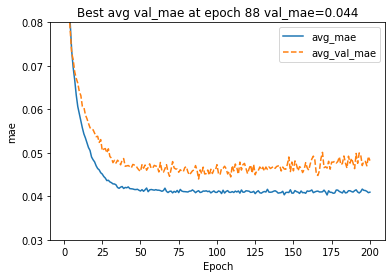

用所有訓練資料重新訓練到第 88 週期, 用測試資料評估 mae=0.046
●訓練與測試 Dense( 8, 4) epoch=200 batch= 1：>0>1>2>3>平均最佳週期=115 val_mae=0.044

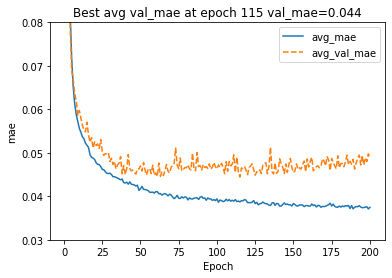

用所有訓練資料重新訓練到第 115 週期, 用測試資料評估 mae=0.053
●訓練與測試 Dense(16, 4) epoch=200 batch= 1：>0>1>2>3>平均最佳週期= 93 val_mae=0.049

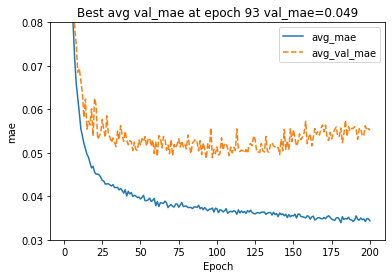

用所有訓練資料重新訓練到第 93 週期, 用測試資料評估 mae=0.060
●訓練與測試 Dense( 4, 8) epoch=200 batch= 1：>0>1>2>3>平均最佳週期= 68 val_mae=0.048

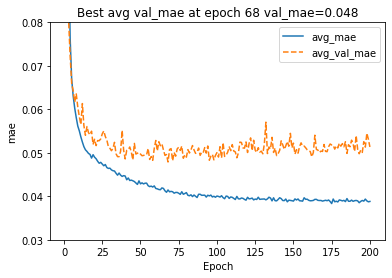

用所有訓練資料重新訓練到第 68 週期, 用測試資料評估 mae=0.050
●訓練與測試 Dense( 8, 8) epoch=200 batch= 1：>0>1>2>3>平均最佳週期= 91 val_mae=0.050

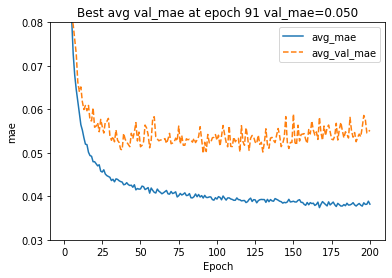

用所有訓練資料重新訓練到第 91 週期, 用測試資料評估 mae=0.055
●訓練與測試 Dense(16, 8) epoch=200 batch= 1：>0>1

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import util2 as u     # 匯入自訂的工具模組

df = pd.read_csv("Admission_Predict_Ver1.1.csv",sep = ",")

import numpy as np

np.random.seed(6)       # 設定亂數的種子, 以便每次執行產生的亂數序列都相同
ds = df.values          # 取出 DataFrame 中的資料 (不含標題欄)
np.random.shuffle(ds)   # 將所有資料洗牌 (隨機重排)

x = ds[:, 1:8]   # 取出所有資料列的第 1 到 7 欄資料做為樣本資料
y = ds[:, 8]     # 取出所有資料列的第 8 欄資料做為標籤資料

x_train = x[:400]  #} 前 400 筆 (0~399) 做為訓練用
y_train = y[:400]  #}
x_test  = x[400:]  #} 後 100 筆 (400~499) 做為測試用
y_test  = y[400:]  #}

###############################

mean = x_train.mean(axis=0)  #←沿著第 0 軸 (樣本數軸) 對每個特徵做平均, 因此 mean.shape 為 (13,)
std = x_train.std(axis=0)    #←沿著第 0 軸 (樣本數軸) 對每個特徵算標準差, std.shape 同樣為 (13,)

x_train -= mean  #← 將訓練樣本減平均值
x_train /= std   #← 再除以標準差

x_test  -= mean  #← 將測試樣本減平均值
x_test  /= std   #← 再除以標準差

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def train(unit1, unit2, epoch, batch):
    np.random.seed(8)       # 設定亂數的種子, 以便每次執行產生的亂數序列都相同
    model = Sequential()
    model.add(Dense(unit1, activation='relu', input_dim=7))
    if unit2>0: model.add(Dense(unit2, activation='relu'))
    model.add(Dense(1))           #←不加任何啟動函數
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    wt = model.get_weights()    #←儲存模型的初始權重
    ksize = len(x_train) // 4   #←計算每折的資料筆數

    all_his_mae = []   #←建立變數來儲存每次訓練的 mae 歷史資料
    all_his_val = []   #←建立變數來儲存每次訓練的 val_mae 歷史資料
    print(f'●訓練與測試 Dense({unit1:2},{unit2:2}) epoch={epoch:3} batch={batch:2}：', end='')
    if show_info==2: print()        #←換行
    for i in range(4):
        print(f'第 {i} 摺訓練與驗證' if show_info==2 else f'>{i}', end='')
        fr, to = i*ksize, (i+1)*ksize  #←計算驗證資料的起點 fr 和終點 to (不含)
        x_val = x_train[fr: to]        #←取出驗證樣本
        x_trn = np.concatenate([x_train[ :fr],  #←準備訓練樣本：取驗證資料以外的部份
                                x_train[to: ]], axis=0)
        y_val = y_train[fr: to]        #←取出驗證標籤
        y_trn = np.concatenate([y_train[ :fr],  #←準備訓練標籤：取驗證資料以外的部份
                                y_train[to: ]], axis=0)

        model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
        history =  model.fit(x_trn, y_trn,
                             validation_data=(x_val, y_val),  #←指定驗證資料
                             epochs=epoch,
                             batch_size=batch,
                             verbose=0)       #←安靜模式 (不顯示訊息)
        if show_info==2:
            hv = history.history['val_mae']  #←取得驗證的歷史記錄
            idx = np.argmin(hv)    #←找出最佳驗證週期
            val = hv[idx]          #←取得最佳驗證的 mae 值
            u.plot(history.history,
                       ('mae', 'val_mae'), #←繪製準確率的歷史線圖
                       f'k={i} Best val_mae at epoch={idx+1} val_mae={val:.3f}',
                       ('Epoch','mae'), ylim=(0.03, 0.08))

        all_his_mae.append(history.history['mae'])     #←儲存 mae 歷史驗證資料
        all_his_val.append(history.history['val_mae']) #←儲存 val_mae 歷史驗證資料

    avg_mae = np.mean(all_his_mae, axis=0)  #←沿著第 0 軸 (k 折軸) 對每個 mae 結果做平均, 因此 avg.shape 為 (200,)
    avg_val = np.mean(all_his_val, axis=0)  #←沿著第 0 軸 (k 折軸) 對每個驗證結果做平均, 因此 avg.shape 為 (200,)
    idx = np.argmin(avg_val)   #← 找出最佳平均驗證結果的週期 (由 0 算起)
    val = round(avg_val[idx], 3)   #←取得最佳平均驗證的 mae 值, 並四捨五入到小數 3 位
    print(f'>平均最佳週期={idx+1:3} val_mae={val:<5.3f}',end='')  #←顯示最佳週期 (由 1 算起) 及其 mae 值
    if show_info:
        u.plot({'avg_mae': avg_mae, 'avg_val_mae': avg_val},  #←繪製歷史線圖
               ('avg_mae', 'avg_val_mae',),
               f'Best avg val_mae at epoch {idx+1} val_mae={val:.3f}',
               ('Epoch','mae'), ylim=(0.03, 0.08))
    model.set_weights(wt)  #←還原初始權重 (效果等於重建模型, 以便重新訓練)
    history =  model.fit(x_train, y_train,
                         epochs=idx+1,        #訓練最佳次數
                         batch_size=batch,    #每批次 batch 筆資料
                         verbose=0)       #安靜模式 (不顯示訊息)
    loss, mae = model.evaluate(x_test, y_test, verbose=0)  #←用測試資料評估成效
    #    print('重練', idx+1, '週期, 再評估 mae =', round(mae*100, 1))
    print(f'用所有訓練資料重新訓練到第 {idx+1} 週期, 用測試資料'
          if show_info else f', 重訓練', end='')
    print(f'評估 mae={mae:<5.3f}')

show_info = 1   # 顯示哪種資訊： 0-簡要資訊, 1-簡要資訊+平均驗證圖, 2-詳細資料
epoch = 200     # 訓練週期

for batch in (1, 2, 4, 8, 16):
    for u2 in (0, 4, 8, 16):
        for u1 in (4, 8, 16):
            train(u1, u2, epoch, batch)

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 18.2835
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 3.0548
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 2.0230
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 3.2295
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 2.0030
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0219
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2640
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2519
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9156
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8531
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9127
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8758
Epoch 13/50
4/4 [==============================] - 0s 3ms/step - loss: 0

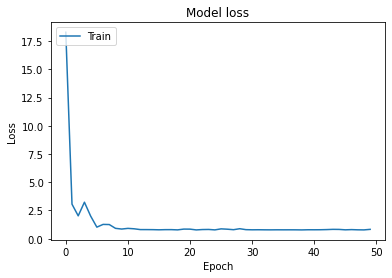

4/4 [==============================] - 0s 3ms/step


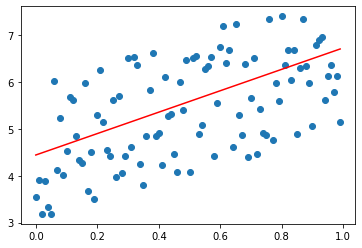

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

# Generate the data
def generate_data(coeffs):
    xs = np.array([i * 0.01 for i in range(100)])
    ys = coeffs[0] * xs + coeffs[1] * (1 + np.random.random(100))
    return xs, ys

# Plot the loss
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

# Train the model
def train_model(model, xs, ys):
    history = model.fit(xs, ys, epochs=50)
    plot_loss(history)

# Predict and plot the data
def predict_and_plot(model, xs, ys):
    xspred = np.array([i * 0.01 for i in range(100)])
    yspred = model.predict(xspred)
    plt.scatter(xs, ys)
    plt.plot(xspred, yspred, 'r')
    plt.show()

xs, ys = generate_data([2, 3])
train_model(model, xs, ys)
predict_and_plot(model, xs, ys)


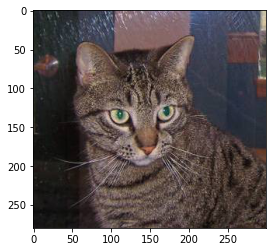

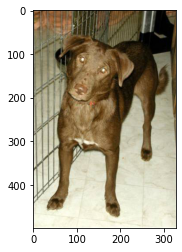

x1.shape =  (280, 300, 3)
x2.shape =  (499, 327, 3)


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img1 = image.load_img('cat_dog/train/cat/cat.1.jpg')  #←讀取圖檔內容
img2 = image.load_img('cat_dog/train/dog/dog.1.jpg')  #←讀取圖檔內容

plt.figure(1)     #←建立新畫框
plt.imshow(img1)  #←繪製圖片
plt.figure(2)     #←建立新畫框
plt.imshow(img2)  #←繪製圖片
plt.show()        #←實際顯示圖片

x1 = image.img_to_array(img1)  #} 將 PIL 影像資料轉為 NumPy 陣列
x2 = image.img_to_array(img2)  #}
print('x1.shape = ', x1.shape) #} 顯示 NumPy 陣列的 shape
print('x2.shape = ', x2.shape) #}

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (_, _) = mnist.load_data()

gobj = ImageDataGenerator(rescale=1./255) #←設定要將圖檔的每一個像素值都乘以 1./255

gen = gobj.flow(               #↓必須轉為 4D 陣列 (最後一軸為 channel, 灰階圖的值為 1)
    train_images.reshape(-1, 28, 28, 1), #←輸入的樣本
    train_labels,                        #←輸入的標籤
    batch_size=10)                       #←批次量

data, label = gen.next()   #←讀取一批次的資料
print(f'第 0 批次樣本的 shape: {data.shape}, 標籤的 shpae: {label.shape}')
print(f'第 0 張圖第 6 橫排的像素值：{data[0].reshape(28,28)[6].round(2)}')
print(f'10 個標籤值為 {label}')


第 0 批次樣本的 shape: (10, 28, 28, 1), 標籤的 shpae: (10,)
第 0 張圖第 6 橫排的像素值：[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.3  0.78 0.99 0.99 0.99 0.75 0.   0.   0.  ]
10 個標籤值為 [1 5 4 6 2 4 3 0 4 9]


In [2]:
! cd /

In [4]:
!pwd

/content


In [6]:
! cd /content && pwd

/content


In [7]:
!git clone https://github.com/jlhsu666/git_diabetes.git


Cloning into 'git_diabetes'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 89 (delta 42), reused 62 (delta 18), pack-reused 0
Unpacking objects: 100% (89/89), 39.43 KiB | 2.08 MiB/s, done.


In [8]:
!pwd

/content


In [9]:
!cd ..

In [10]:
!pwd


/content


In [11]:
!ls

git_diabetes  sample_data
